# Программирование для всех <br>(основы работы с Python)

*Разработчик формата сдачи заданий и фабрики автоматических тестов: Щуров И.В.<br> 
Автор задач: Тамбовцева А.А.*

## Практикум 4-01: формат JSON и немного визуализации

* Краткое знакомство с форматом JSON.
* Сюжет 1: загрузка данных из JSON-строки и построение диаграмм.
* Сюжет 2: загрузка данных из JSON-файла и визуализация динамики.

### Краткое знакомство с форматом JSON

JSON (от *JavaScript Object Notation*) – текстовый формат хранения данных, изначально использовался в языке JavaScript, но затем стал универсальным машиночитаемым форматом, распознаваемым разными языками программирования. Различают: 

* JSON-строки (текст с определённой структурой данных внутри);
* JSON-файлы (текстовые файлы с расширением `.json` со строкой JSON-внутри).

Какие структуры данных Python могут встретиться внутри JSON-строки? Знакомые нам списки и словари!

**Пример JSON-строки, содержащей списки**:

In [1]:
# фрагмент результатов голосования в Арбитражный комитет Википедии: 
# время голосования, голос, кандидат, избиратель:

example01 = """
[["2008-11-23 00:32:00", "-", "Solon", "Kalan"], 
  ["2008-11-23 00:34:00", "+", "Chronicler", "Altes"], 
  ["2008-11-23 00:34:00", "+", "Ilya Voyager", "Altes"]]
"""

**Пример JSON-строки, содержащей словари:**

In [2]:
# фрагмент результатов голосования за актеров 
# на сайте kinoteatr.ru

example02 = """
{ "id":"16804", "plus":"131", "minus":"4", "voted":"" },
{ "id":"56008", "plus":"91", "minus":"10", "voted":"" },
{ "id":"62460", "plus":"94", "minus":"4", "voted":"" }
"""

Этот формат хранения данных удобен своей универсальностью. Во-первых, он позволяет сохранять и выгружать в компактные текстовые файлы данные со сложной структурой (например, словари, внутри которых есть ещё словари). Во-вторых, формат JSON не привязан к какому-то конкретному языку программирования. Можно создать список списков в Python, выгрузить его в строку JSON, затем считать эту строку с помощью другого языка и получить результат в виде аналогичных структур данных, принятых в этом языке (например, аналогом питоновского словаря *dict* в языке R может выступить поименованный вектор или фрейм *list*).

По этим причинам формат JSON очень популярен. Его можно встретить при работе с географическими данными (файлы с особым расширением `.geojson`, которые содержат метки с координатами объектов), при парсинге HTML-страниц (файлы `.json`, из которых «подтягивается» регулярно обновляемая информация для построения всяких интерактивных визуализаций на сайте) и при подключении к API – интерфейсам, которые можно использовать как базы данных для автоматизированной выгрузки данных из приложений и социальных сетей.

В этом практикуме мы поработаем со строками и файлами JSON и заодно обсудим некоторые примеры визуализации данных.

Импортируем необходимые для работы библиотеки и модули:

* модуль `json` для обработки JSON-строк и JSON-файлов;
* библиотеку `pandas` для работы с датафреймами (данными в табличном виде);
* модуль `pyplot` с сокращённым названием `plt` из библиотеки `matplotlib` для построения графиков.

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt

Модуль `json` базовый (как знакомый нам `math`), он не требует дополнительной установки. Библиотеки `pandas` и `matplotlib` базовыми не являются, но если мы работаем в Jupyter Notebook, входящим в дистрибутив Anaconda, они уже предустановлены (в Google Colab тоже).

### Сюжет 1: загрузка данных из JSON-строки и построение диаграмм

Посмотрим на пример данных в виде JSON-строки на странице с оценками фильма пользователей сайта Кинопоиск. Так как пока мы не обсуждали работу с HTML-страницами, чтобы понять, откуда взяты данные в строке `str_data` ниже, выполним три шага:

* откроем [страницу](https://www.kinopoisk.ru/film/44587/) фильма «Господин оформитель»;
* заметим, что с нее можно перейти на [страницу](https://www.kinopoisk.ru/film/44587/votes/) с рейтингом и оценками;
* откроем исходный код страницы (кликнуть правой клавишей и выбрать *Просмотр кода страницы*) и найдем через поиск по странице ссылку на JSON-файл, [откуда](https://kinopoisk-fvs.s3.yandex.net/films/44587/value-stats.json) подгружаются данные для построения кольцевой диаграммы. 

Итак, так как информации здесь немного, можем просто скопировать её со страницы в виде строки (это валидная строка в формате JSON):

In [4]:
# тройные кавычки нужны для написания большого текста внутри,
# с переходами на новые строки, чтобы Python понимал,
# что строка продолжается и не выдавал ошибку синтаксиса,
# не найдя закрывающие кавычки на той же строке

str_data = """
[{"value":251,"title":"1","out":null},
{"value":140,"title":"2","out":null},
{"value":212,"title":"3","out":null},
{"value":307,"title":"4","out":null},
{"value":746,"title":"5","out":null},
{"value":1259,"title":"6","out":null},
{"value":2195,"title":"7","out":"true"},
{"value":2109,"title":"8","out":null},
{"value":1120,"title":"9","out":null},
{"value":1657,"title":"10","out":null}]
"""

Почему данные хранятся именно в таком виде? Во-первых, важно, чтобы информация, необходимая для построения графика, лежала в отдельном файле на сервере, чтобы была возможность этот файл динамически (в режиме реального времени или регулярно с определённой частотой) обновлять для построения актуальных визуализаций. Во-вторых, выбор формата обсуловлен тем, что графики, тем более, интерактивные, строятся с помощью языка JavaScript, в котором JSON и возник изначально.

Если мы посмотрим внимательно на `str_data`, мы заметим, что внутри этой строки лежит обычный список словарей. Каждый словарь описывает один сектор диаграммы (10 секторов = 10 значений оценок, фильмы оцениваются по 10-балльной шкале), а именно:

* записи с ключом `title` содержат оценки от 1 до 10;
* записи с ключом `value` содержат количество таких оценок;
* записи с ключом `out` содержат отметки того, какие сектора отодвинуты на графике (здесь один – с оценками 7, где значение `true`).

Для преобразования строки в полноценный список словарей воспользуемся функцией `.loads()` из модуля `json`: 

In [5]:
L = json.loads(str_data)
L # получилось!

[{'value': 251, 'title': '1', 'out': None},
 {'value': 140, 'title': '2', 'out': None},
 {'value': 212, 'title': '3', 'out': None},
 {'value': 307, 'title': '4', 'out': None},
 {'value': 746, 'title': '5', 'out': None},
 {'value': 1259, 'title': '6', 'out': None},
 {'value': 2195, 'title': '7', 'out': 'true'},
 {'value': 2109, 'title': '8', 'out': None},
 {'value': 1120, 'title': '9', 'out': None},
 {'value': 1657, 'title': '10', 'out': None}]

> **Примечание.** В модуле `json` есть две функции, `loads()` и `load()`. Первая преобразует данные из обычной строки (как здесь), вторая – данные, загруженные из файла (будет далее). Преобразование JSON-строки в структуру данных называется *десериализацией JSON*. Обратная операция – превращение структуры данных в Python в JSON-строку – тоже существует, и называется  она *сериализацией JSON*. Для сериализации используется аналогичная пара функций, `dumps()` и `dump()`. Первая будет превращать структуру данных в JSON-строку, вторая - превращать структуру данных в строку и выгружать эту строку в файл с расширением `.json`. Подробно на этих функциях останавливаться не будем, позже будем обсуждать выгрузку данных сразу в удобном табличном виде.

Итак, список словарей мы получили. Вряд ли кому-то захочется через цикл извлекать значения из каждого словаря отдельно (к тому же, теоретически таких словарей может быть много), поэтому поступим проще – преобразуем список словарей в датафрейм `pandas`, в более удобную табличку:

In [6]:
# функция DataFrame() из pandas
# умеет, в частности, превращать список списков
# или список словарей в датафрейм – таблицу

small = pd.DataFrame(L)
small

,value,title,out
0,251,1,None
1,140,2,None
2,212,3,None
3,307,4,None
4,746,5,None
5,1259,6,None
6,2195,7,true
7,2109,8,None
8,1120,9,None
9,1657,10,None


Датафреймы `pandas` по своей структуре чем-то похожи на словари, поэтому столбцы из датафрейма можно извлекать по названию, как раньше мы извлекали значения по ключу в словаре, указав название в квадратных скобках: 

In [7]:
x = small["title"]
y = small["value"]

In [8]:
print(x)
print(y)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: title, dtype: object
0     251
1     140
2     212
3     307
4     746
5    1259
6    2195
7    2109
8    1120
9    1657
Name: value, dtype: int64


Столбцы таблицы – объекты специального типа *pandas Series*, серии значений, похожие на массивы, где за каждым значением явно закреплён его индекс (выше мы видим значения и индексы 0-10 слева от них). Так же как и массивы, столбцы датафрейма могут содержать объекты только одного типа. В `x` сохранены текстовые значения, тип `object` в `dtype` (от *data type*) – аналог классического питоновского `string`, просто в `pandas` строковый тип называется иначе. В `y` сохранены целочисленные значения, тип `integer`.

Построим столбиковую диаграмму – воспользуемся функцией `bar()` из модуля `pyplot`, который мы сократили до `plt`:

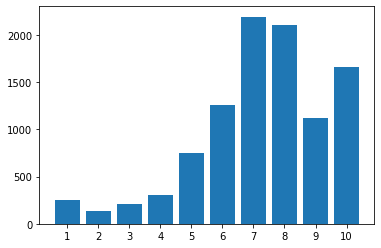

In [9]:
# точка с запятой в конце – чтобы не выводилось 
# вспомогательных объектов/сообщений, только картинка

# столбиковая диаграмма - barplot(), отсюда и функция

plt.bar(x, y);

Давайте сделаем график повеселее – поработаем с цветами. Рассмотрим пример готовой цветовой палитры из 10 цветов – палитра *Pink Foam* [отсюда](https://www.heavy.ai/blog/12-color-palettes-for-telling-better-stories-with-your-data)). Если мы хотим использовать все 10 цветов, всё просто: забираем коды всех цветов, сохраняем в список, а затем этот список названий цветов добавляем в опцию `color` у функции `bar()`. Но мы пойдём более сложным путём. Поделим все оценки по-вышкинскому (оценки 1-3 плохие, оценки 4-5 удовлетворительные, 6-7 хорошие, 8-10 отличные) и за каждой категорией закрепим свой цвет:

In [10]:
# чтобы не создавать список с повторяющими значениями,
# копируя названия цветов, воспользуемся тем, что списки можно 
# умножать на число и склеивать друг с другом через +

cc = ["#d7658b"] * 3 + ["#e4bcad"] * 2 + ["#badbdb"] * 2 + ["#76c8c8"] * 3
cc

['#d7658b',
 '#d7658b',
 '#d7658b',
 '#e4bcad',
 '#e4bcad',
 '#badbdb',
 '#badbdb',
 '#76c8c8',
 '#76c8c8',
 '#76c8c8']

Добавляем цвета на график – вписываем список в аргумент `color`: 

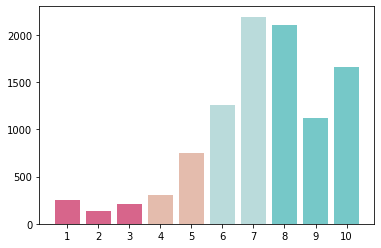

In [11]:
plt.bar(x, y, color = cc);

Теперь построим круговую диаграмму, хотя такие диаграммы и не всегда удачные. Так как круговая диаграмма на английском *pie chart*, функция из `plt` тоже называется `pie`:

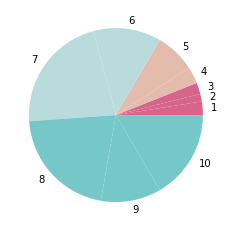

In [12]:
# y – значения (частоты для каждой оценки)
# labels – подписи секторов

plt.pie(y, 
        colors = cc, 
        labels = x);

У нас диаграмма тоже получилась не очень удачная, попробуем исправить – добавить разбиение, то есть «зазор» между секторами:

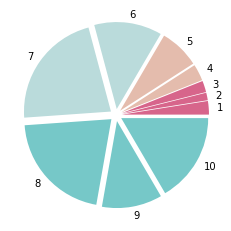

In [13]:
# зазор – аргумент explode
# логика та же, что с цветами
# зазор для каждого сектора, дублируем значение 0.07 десять раз

plt.pie(y, 
        colors = cc, 
        labels = x, 
        explode = [0.07] * 10);

Круговые диаграммы – это несовременно, сделаем нашу диаграмму кольцевой! В модуле `plt` нет специальной функции для кольцевой диаграммы, поэтому придётся пойти на хитрость:

* построить обычную круговую диаграмму, как выше;
* добавить на неё белый круг желаемого радиуса. 

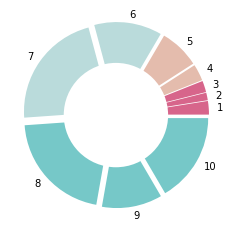

In [14]:
# немного мистики и магии – очерчиваем белый круг
# радиуса 0.6 с центром в (0, 0)
# fc = face color, цвет заливки

centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# сохраняем текущий график – тот, что ниже через pie()
# gcf = get current figure

fig = plt.gcf()

plt.pie(y, 
        colors = cc, 
        labels = x, 
        explode = [0.07] * 10);


# в оси уже существующего графика добавляем круг
# gca = get current axes

fig.gca().add_artist(centre_circle);

Теперь перейдём к сюжету поинтереснее.

### Сюжет 2: загрузка данных из JSON-файла и визуализация динамики

На странице с оценками, поставленными фильму, есть график, который создан для отражения динамики оценок за последний месяц (или больше). Строго говоря, это не совсем график динамики оценок, это просто линейный график, который соединяет оценки, поставленные разными пользователями в разное время. Правильнее было бы, например, добавить группировку по дате проставления оценок, агрегировать данные (вычислив медианную оценку за каждый день) и потом уже отслеживать изменения медианной оценки, переходя от одной даты к другой. Но, так как графики для визуализации динамики строятся по той же схеме, оставим идею графика неизменной. 

Для начала загрузим файл с данными `last_votes.json`.

**Примечание для Jupyter Notebook.** Удобно, если файл с данными при работе лежит в той же папке, что и текущий ipynb-файл, в котором мы запускаем код, так не придется полностью прописывать к нему путь, достаточно одного названия с расширением. Загрузите файл с данными через *Upload* на *Home Page*, как обычно загружайте файл с практикумом. Более общий способ загрузки файлов – прописать к нему путь, который можно найти, кликнув на файл правой клавишей и открыв *Свойства* (путь к файлу, без названия самого файла, в *Расположение*). Пример:

    file = open("/Users/allat/Desktop/last_votes.json") 

Уточнение для Windows: Python воспринимает `\` как специальный символ, в путях к файлам он распознаёт только `/`. Чтобы ничего не ломалось и чтобы не менять вручную все `\` на `/`, можно перед путём к файлу добавить `r`:


    file = open(r"C:\\Users\allat\Desktop\last_votes.json") 


**Примечание для Google Colab.** Загрузить файл с данными в облачное хранилище можно через кнопку *Files* (значок папки слева от рабочей области с ячейками), при нажатии на которую появляется возможность выбрать файл с компьютера (значок стрелки). После добавления файла его можно выбрать, кликнуть на три точки справа от названия, скопировать путь через *Copy path* и вставить его в функцию `open()`. Например:

    file = open("/content/last_votes.json") 

In [15]:
file = open("last_votes.json")

Объект `file` – это соединение с файлом, функция `open()` по умолчанию открывает его только для чтения файла, для редактирования и создания нового нужны дополнительные аргументы.

Считаем данные из файла с расширением `.json` с помощью функции `.load()` из модуля `json`, в качестве аргумента этой функции подставим `file`:

In [16]:
data = json.load(file)

Теперь `data` – это список словарей. Несколько элементов `data` для примера:

In [17]:
data[0:10]

[{'num': 0, 'value': 9, 'alt': '', 'url': '', 'time': '08.08.23 22:32'},
 {'num': 1, 'value': 9, 'alt': '', 'url': '', 'time': '08.08.23 22:32'},
 {'num': 2, 'value': 9, 'alt': '', 'url': '', 'time': '08.08.23 22:33'},
 {'num': 3, 'value': 8, 'alt': '', 'url': '', 'time': '08.08.23 22:34'},
 {'num': 4, 'value': 9, 'alt': '', 'url': '', 'time': '08.08.23 22:34'},
 {'num': 5, 'value': 9, 'alt': '', 'url': '', 'time': '08.08.23 22:35'},
 {'num': 6, 'value': 7, 'alt': '', 'url': '', 'time': '08.08.23 22:35'},
 {'num': 7, 'value': 9, 'alt': '', 'url': '', 'time': '08.08.23 22:35'},
 {'num': 8, 'value': 10, 'alt': '', 'url': '', 'time': '08.08.23 22:36'},
 {'num': 9, 'value': 8, 'alt': '', 'url': '', 'time': '08.08.23 22:36'}]

Тоже превратим список словарей в датафрейм:

In [18]:
df = pd.DataFrame(data)
df

,num,value,alt,url,time
0,0,9,,,08.08.23 22:32
1,1,9,,,08.08.23 22:32
2,2,9,,,08.08.23 22:33
3,3,8,,,08.08.23 22:34
4,4,9,,,08.08.23 22:34
...,...,...,...,...,...
495,495,6,,,01.10.23 18:54
496,496,10,,,01.10.23 18:57
497,497,10,,,01.10.23 21:36
498,498,10,,,02.10.23 14:26


Посмотрим на столбец с пометкой времени:

In [19]:
df["time"]

0      08.08.23 22:32
1      08.08.23 22:32
2      08.08.23 22:33
3      08.08.23 22:34
4      08.08.23 22:34
            ...      
495    01.10.23 18:54
496    01.10.23 18:57
497    01.10.23 21:36
498    02.10.23 14:26
499    02.10.23 21:00
Name: time, Length: 500, dtype: object

Python сообщает, что тип столбца `object`, то есть текст. Если мы хотим работать со значениями этого столбца как с полноценными датами (выполнять сортировку в хронологическом порядке, строить графики для динамики), ничего не получится, ведь обычный текст Python упорядочивает по алфавиту.

Преобразуем его в столбец специального типа *дата-время* и запишем результаты в новый столбец `Time`:

In [20]:
df["Time"] = pd.to_datetime(df["time"], format='%d.%m.%y %H:%M')

Что мы сделали? Выполнили своего рода форматирование. Функция `to_datetime()` умеет переводить текст в дату-время, но ей надо явно показать, где в нашем тексте день, месяц, год, часы, минуты, секунды. Поэтому мы пишем шаблон, описывающий устройство метки времени в столбце `Time`:

* `%d` – день;
* `%m` – месяц в виде числа;
* `%y` – год в двузначном виде (23, не 2023);
* `%H` – часы;
* `%M` – минуты;
* все нечисловые символы тоже описываем, показываем, что в наших данных день-месяц-год разделены точками, а перед временем стоит пробел.

Откуда взялись эти обозначения и как быть, если в других данных у нас будет иной вид временных меток – можно посмотреть [здесь](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)). Сравним столбцы `time` и `Time`:

In [21]:
df

,num,value,alt,url,time,Time
0,0,9,,,08.08.23 22:32,2023-08-08 22:32:00
1,1,9,,,08.08.23 22:32,2023-08-08 22:32:00
2,2,9,,,08.08.23 22:33,2023-08-08 22:33:00
3,3,8,,,08.08.23 22:34,2023-08-08 22:34:00
4,4,9,,,08.08.23 22:34,2023-08-08 22:34:00
...,...,...,...,...,...,...
495,495,6,,,01.10.23 18:54,2023-10-01 18:54:00
496,496,10,,,01.10.23 18:57,2023-10-01 18:57:00
497,497,10,,,01.10.23 21:36,2023-10-01 21:36:00
498,498,10,,,02.10.23 14:26,2023-10-02 14:26:00


Визуально похожи, но в столбце `Time` время указано уже в принятом в `pandas` год-месяц-день и время с секундами. 

Выберем последние 40 отзывов:

In [22]:
# tail() выбирает последние строки таблицы, сколько захотим
# есть аналогичный метод head() для выбора первых строк

last = df.tail(40)

Сохраним время и оценки в переменные `x` и `y`:

In [23]:
x = last["Time"].values
y = last["value"].values

В `x` и `y` хранятся массивы из значений (`.values` позволяет получить именно массивы – перечни значений, а не столбцы с номерами строк). Сравните:

In [24]:
last["value"]

460     8
461     9
462     2
463     7
464     8
465     8
466     9
467     5
468    10
469     5
470     7
471     8
472    10
473     4
474    10
475     8
476     9
477    10
478    10
479     1
480    10
481    10
482     7
483    10
484     9
485     4
486    10
487     7
488     9
489     9
490     7
491     7
492     3
493     6
494     1
495     6
496    10
497    10
498    10
499     7
Name: value, dtype: int64

In [25]:
last["value"].values

array([ 8,  9,  2,  7,  8,  8,  9,  5, 10,  5,  7,  8, 10,  4, 10,  8,  9,
       10, 10,  1, 10, 10,  7, 10,  9,  4, 10,  7,  9,  9,  7,  7,  3,  6,
        1,  6, 10, 10, 10,  7])

Построим график динамики оценок (как на Кинопоиске, а то и лучше). 

Вообще график `matplotlib` состоит из двух частей:

* «рамка» для картинки (обычно сохраняется в переменную `fig`);
* поле с осями, внутри которого строится график (обычно сохраняется в переменную `ax`).

Так, мы можем воспользоваться функцией `subplots()` и сообщить Python, что мы хотим получить картинку размера 16 на 9 дюймов с разрешением 300 точек на дюйм (`dpi` – *dots per inch*):

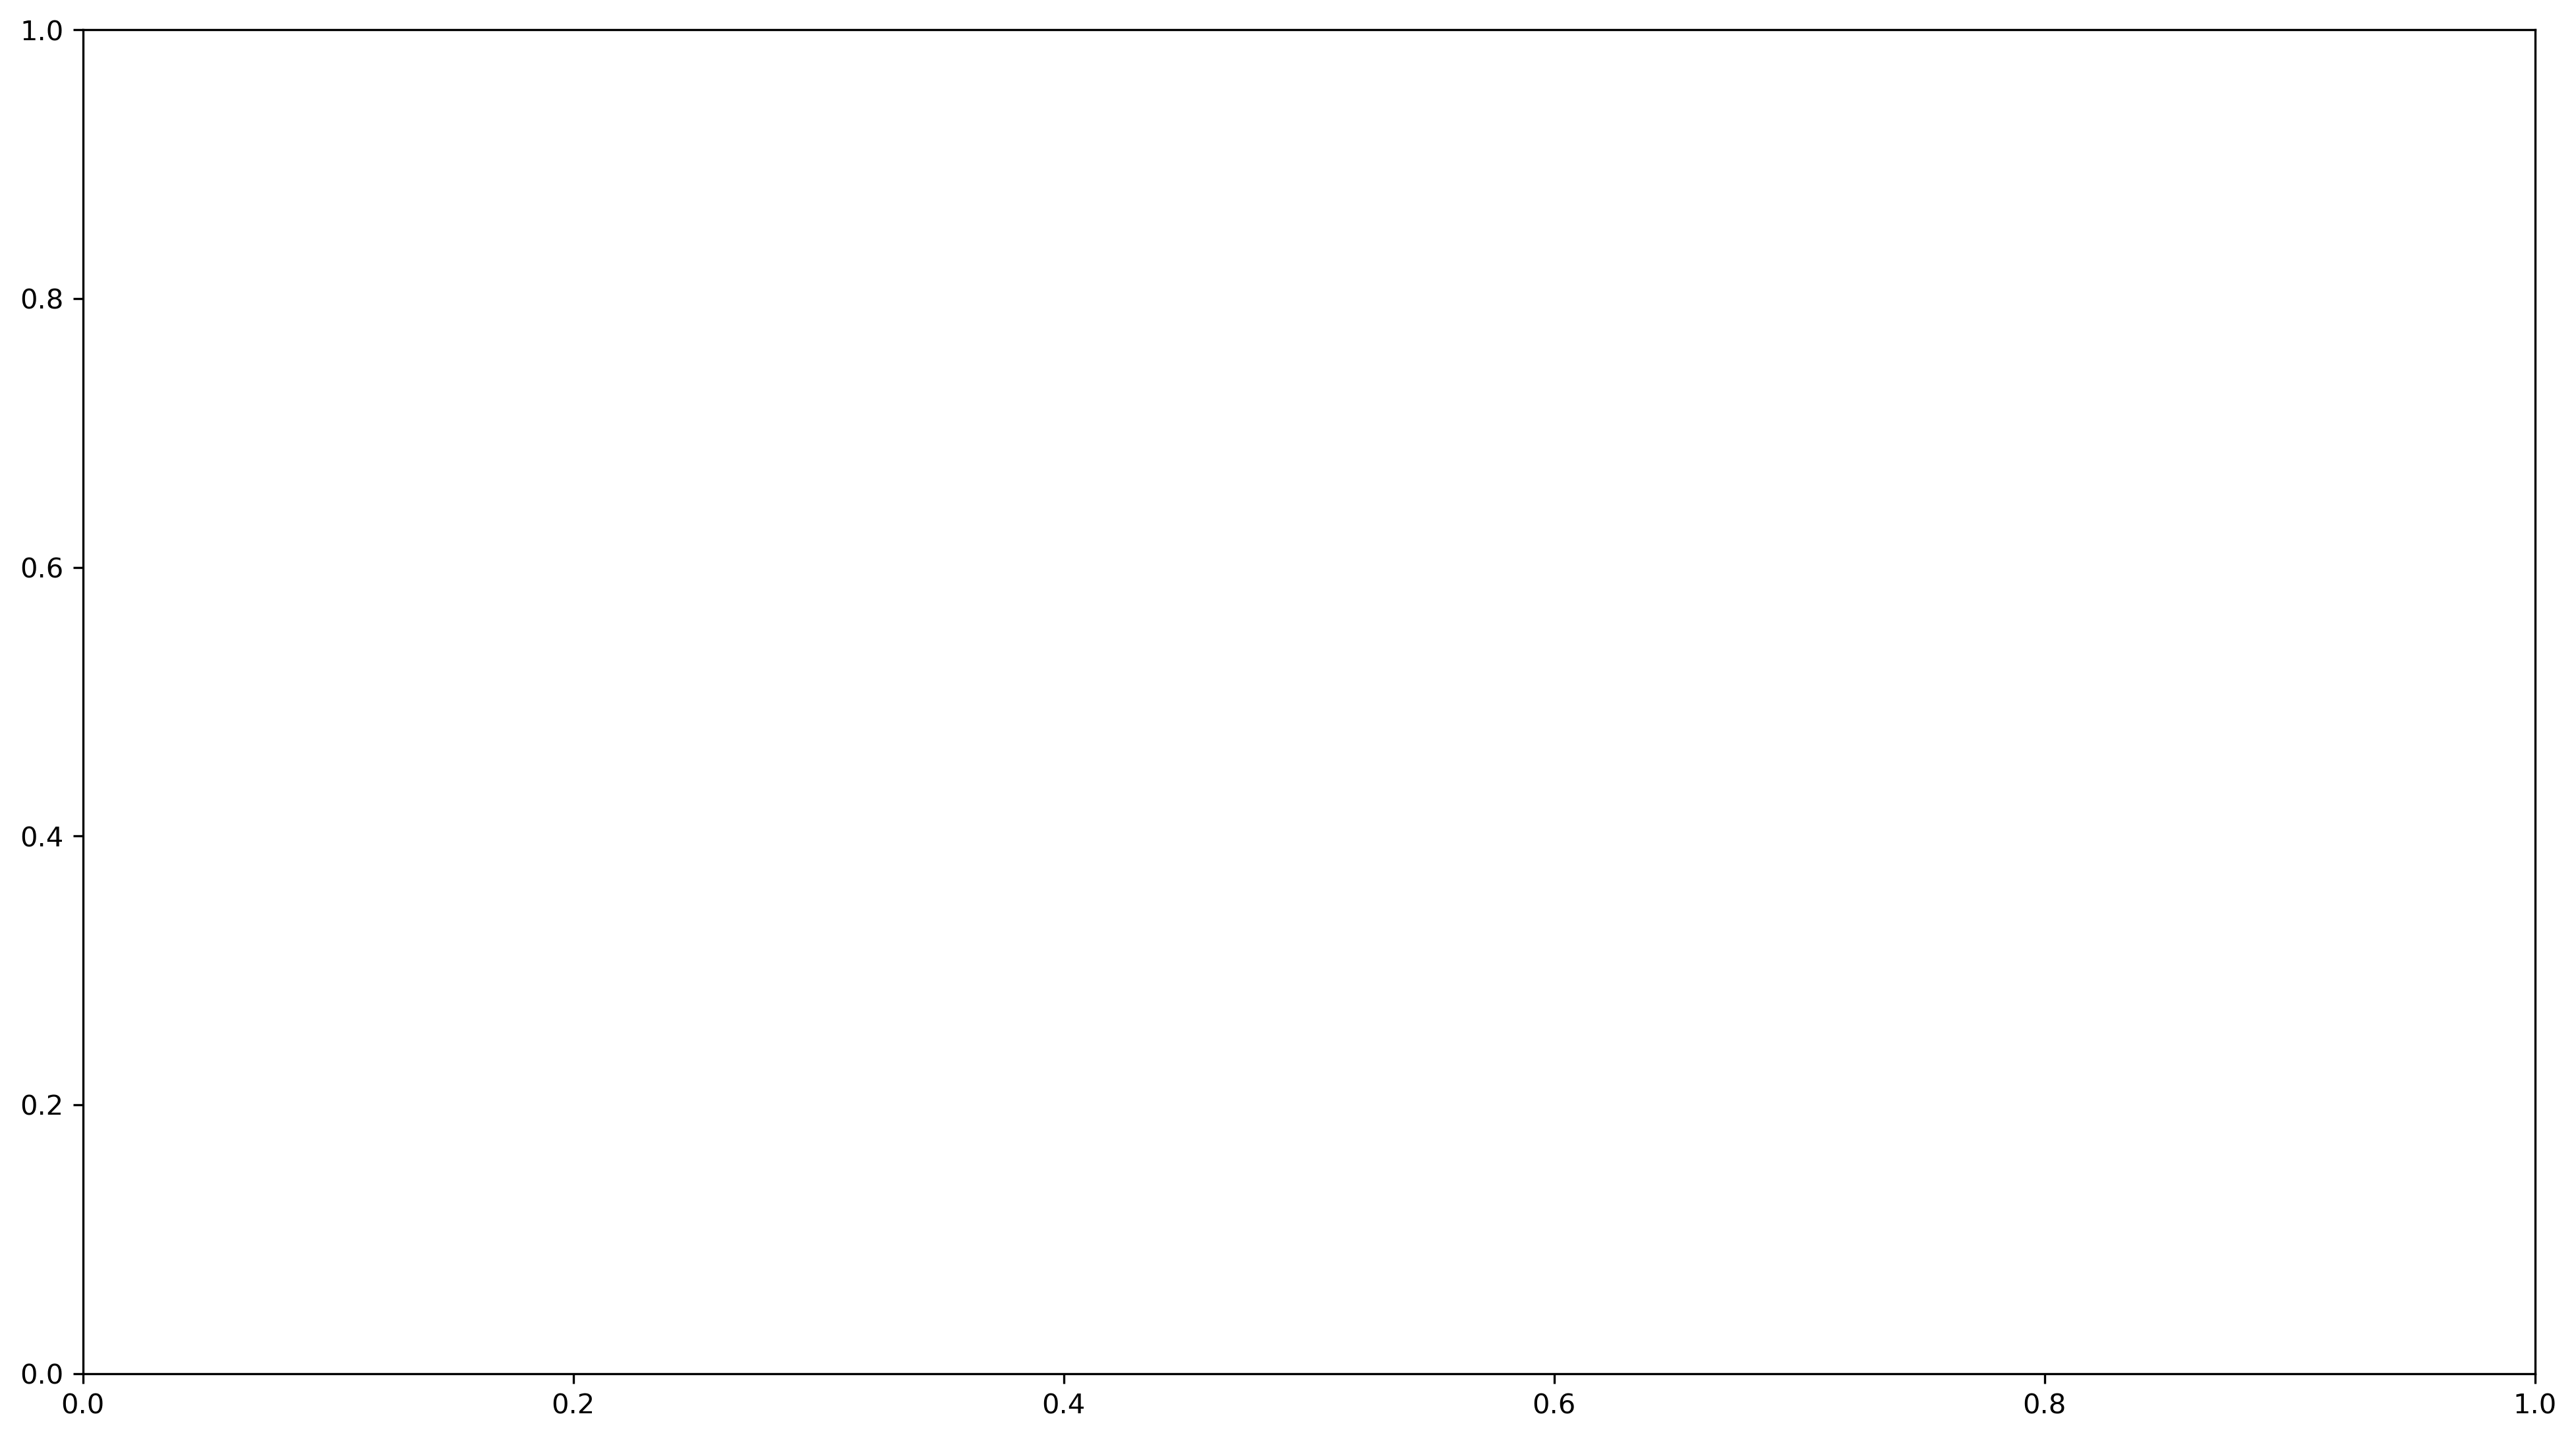

In [26]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

Неформально, создавая `fig` мы резервируем место под картинку соответствующего размера, а затем проводим различные манипуляции с `ax`, чтобы внутри этого поля для картинки построить график, настроить подписи, оси и прочее. Соответственно, к `ax` мы будем применять различные методы, а по завершении работы сможем выгрузить объект `fig` в файл PNG или JPEG. Вообще функция `subplots()`, как следует из ее названия, может использоваться для построения сразу нескольких графиков, но у нас пока внутри `fig` будет один.

Добавляем график – функция `plot()` умеет строить графики по точкам и соединять их линиями – и сразу добавляем настройки:

* цвет линии `color` (про цвета можно почитать [здесь](https://matplotlib.org/stable/gallery/color/named_colors.html));
* тип маркера `marker` для точки (`s` – квадрат, про типы маркеров можно почитать [здесь](https://matplotlib.org/stable/api/markers_api.html));
* размер маркера `markersize` для точки;
* цвет границ маркера для точки `markeredgecolor`.

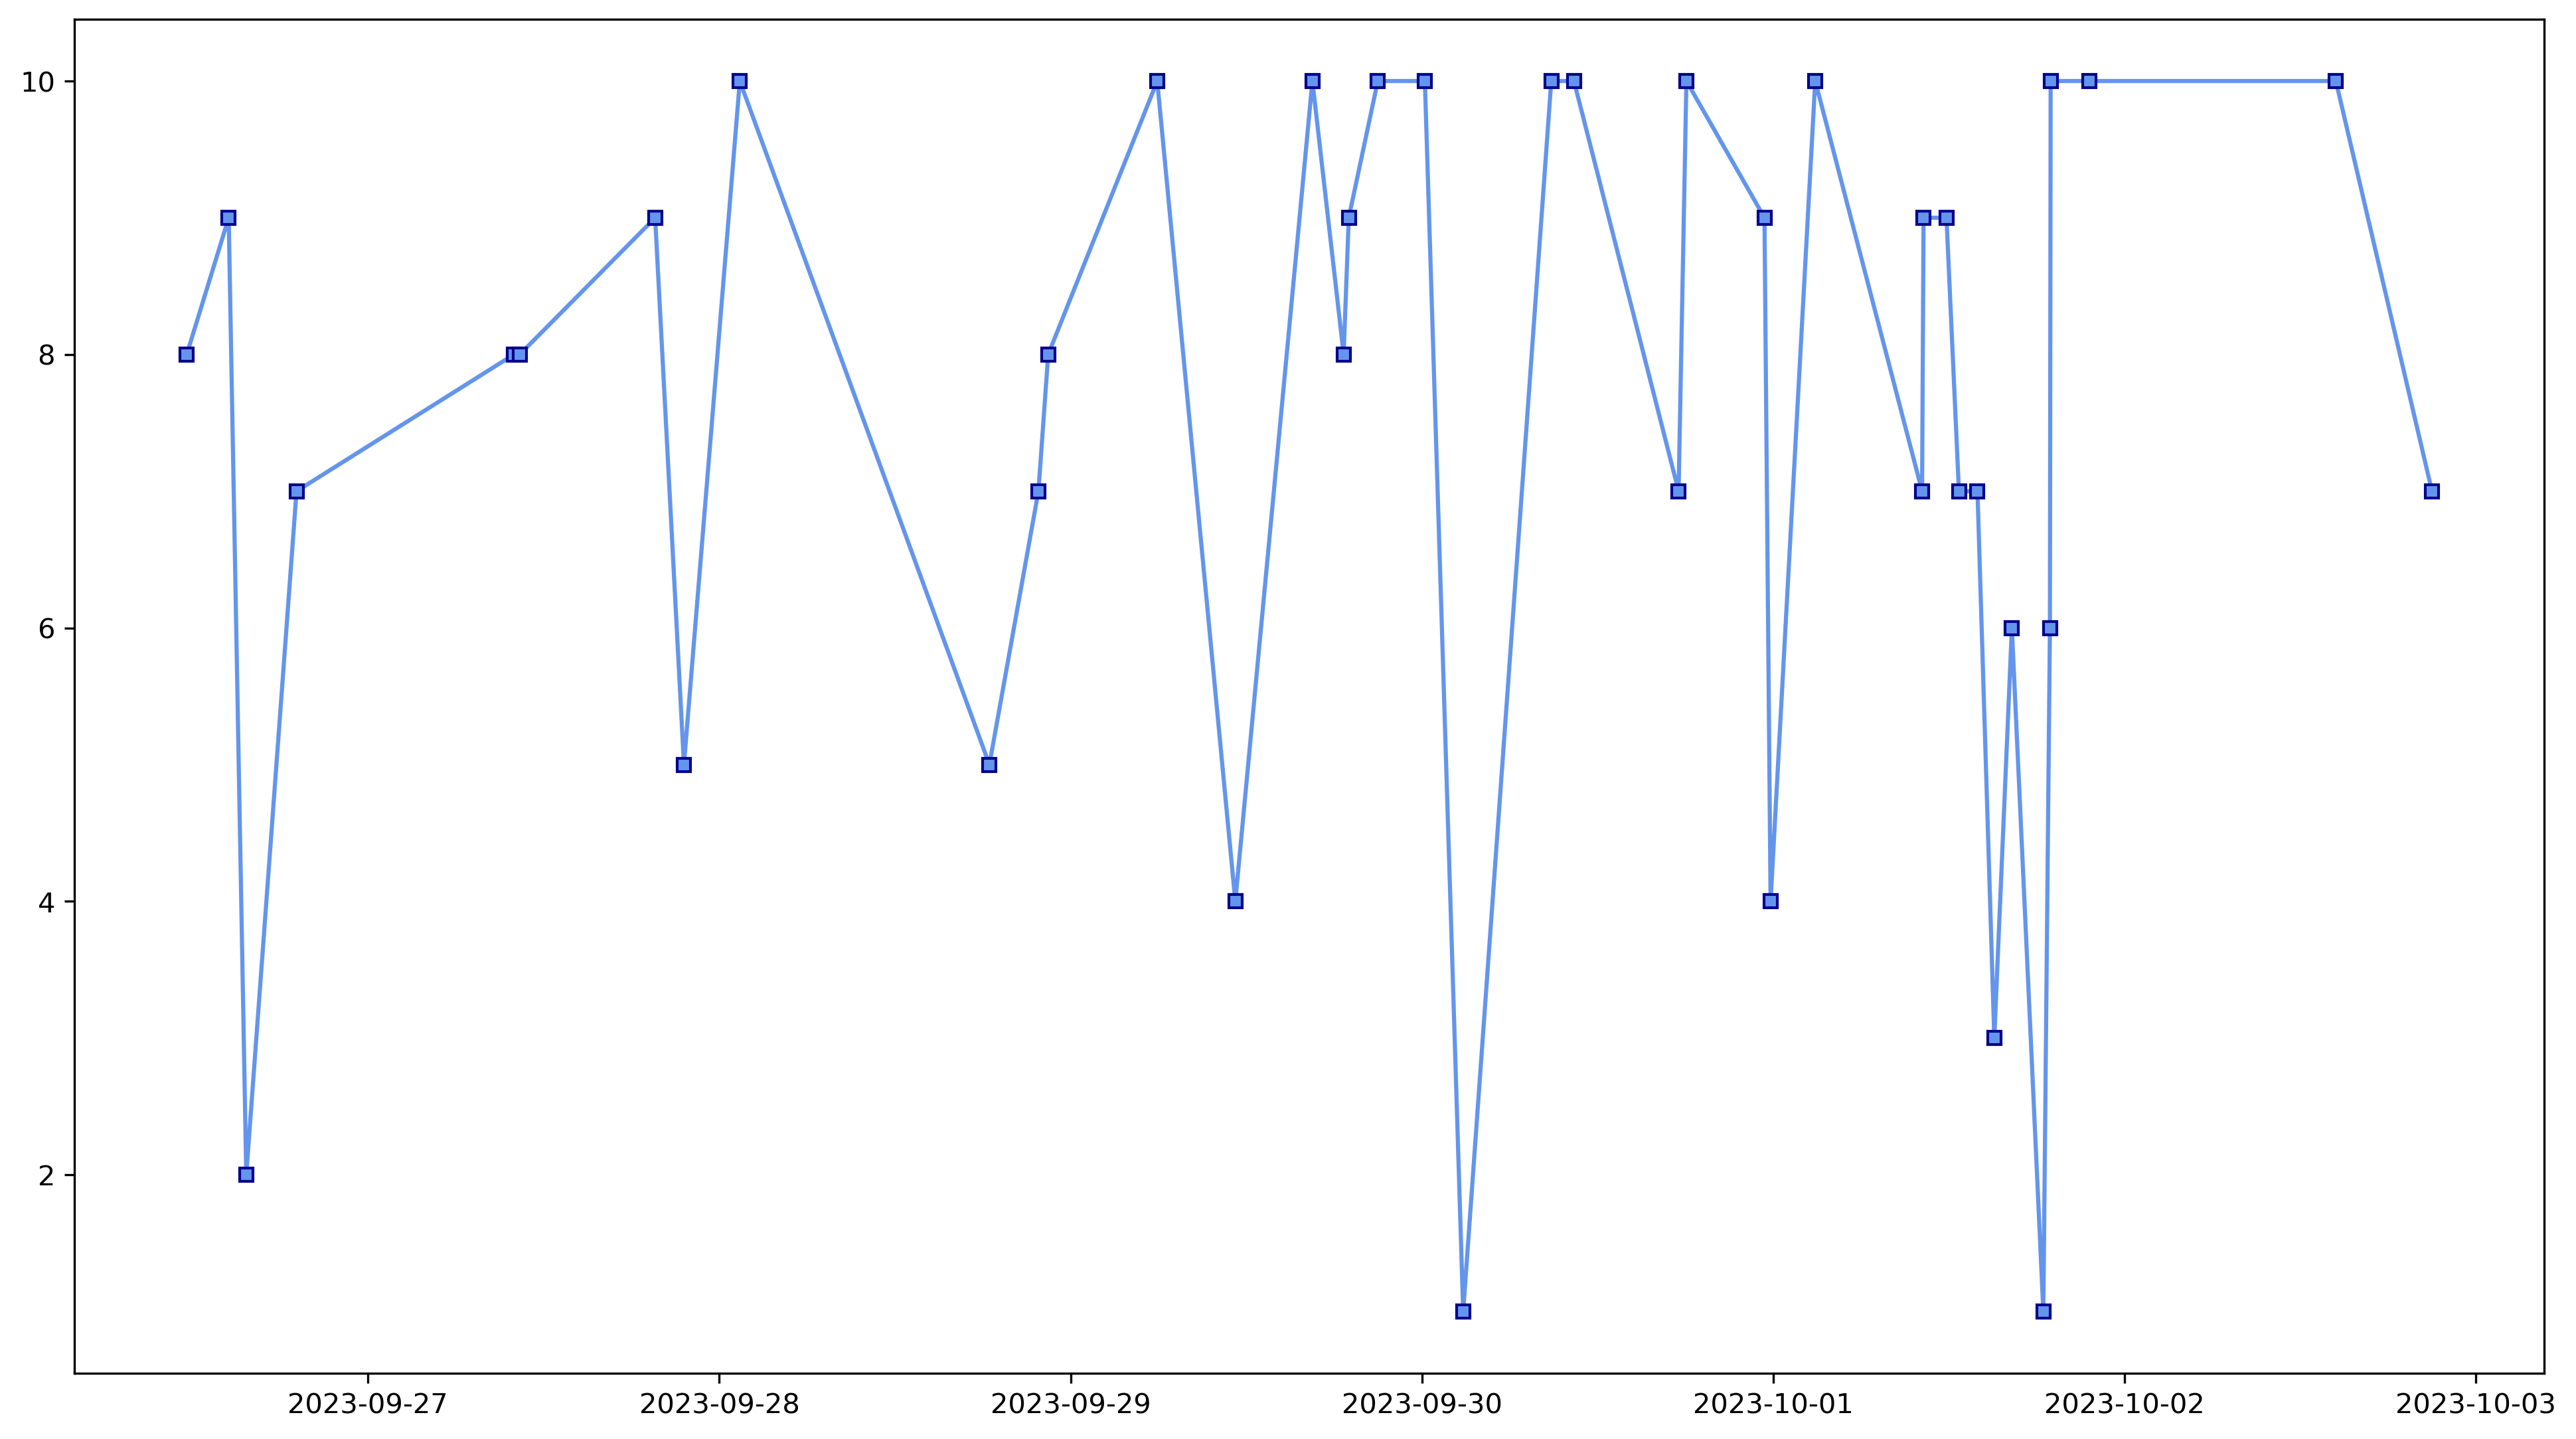

In [27]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# по оси x значения их x (горизонтальная ось на первом месте)
# по оси y значения их y (вертикальная ось на втором месте)

ax.plot(x, y, 
        color = "cornflowerblue", 
        marker = "s", 
        markersize = 5, 
        markeredgecolor = "darkblue");

Добавим заливку под графиком с прозрачностью (`alpha` – плотность цвета, 1 соответствует чистому цвету без прозрачности, чем ближе значение к 0, тем выше прозрачность):

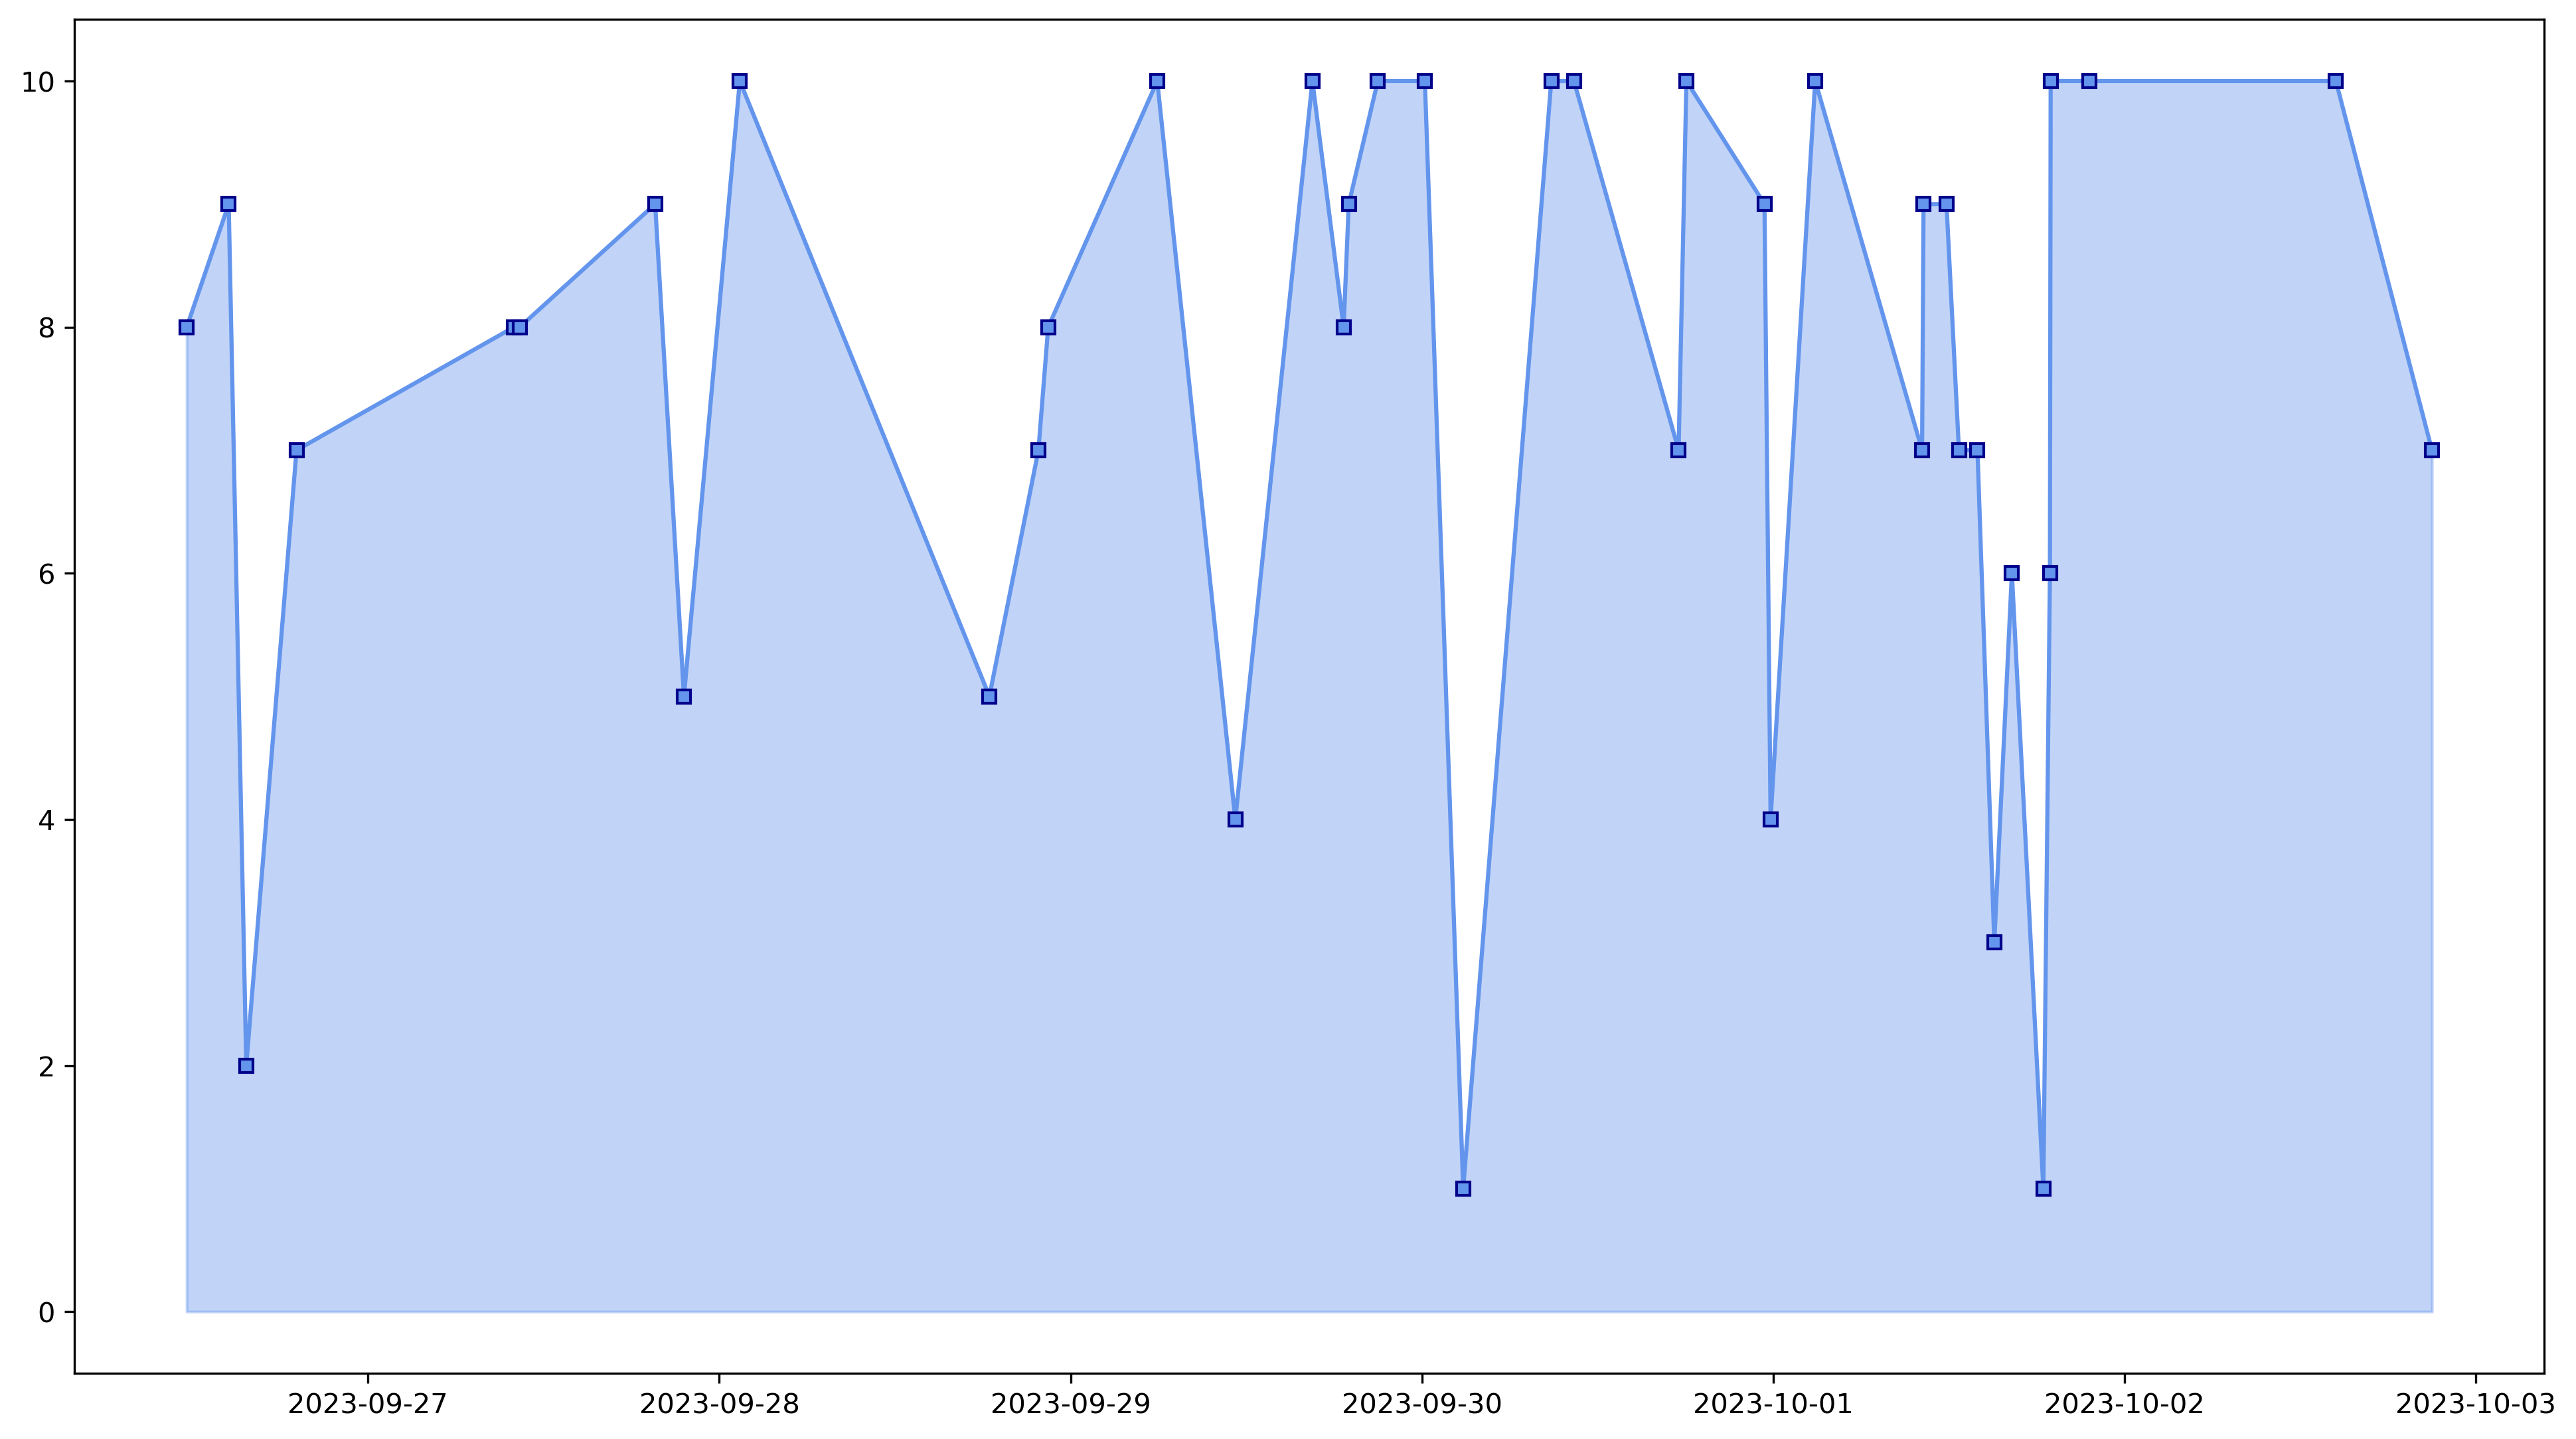

In [28]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# по оси x значения их x (горизонтальная ось на первом месте)
# по оси y значения их y (вертикальная ось на втором месте)

ax.plot(x, y, 
        color = "cornflowerblue", 
        marker = "s", 
        markersize = 5, 
        markeredgecolor = "darkblue");

# fill_between() – заливка между графиком и осями
# alpha – плотность цвета

ax.fill_between(x, y, 
                color = "cornflowerblue", 
                alpha = 0.4);

Так как мы все приличные люди, добавим на график подписи:
    
* `set_title()`: заголовок графика;
* `set_xlabel()`: подпись оси X;
* `set_ylabel()`: подпись оси Y.

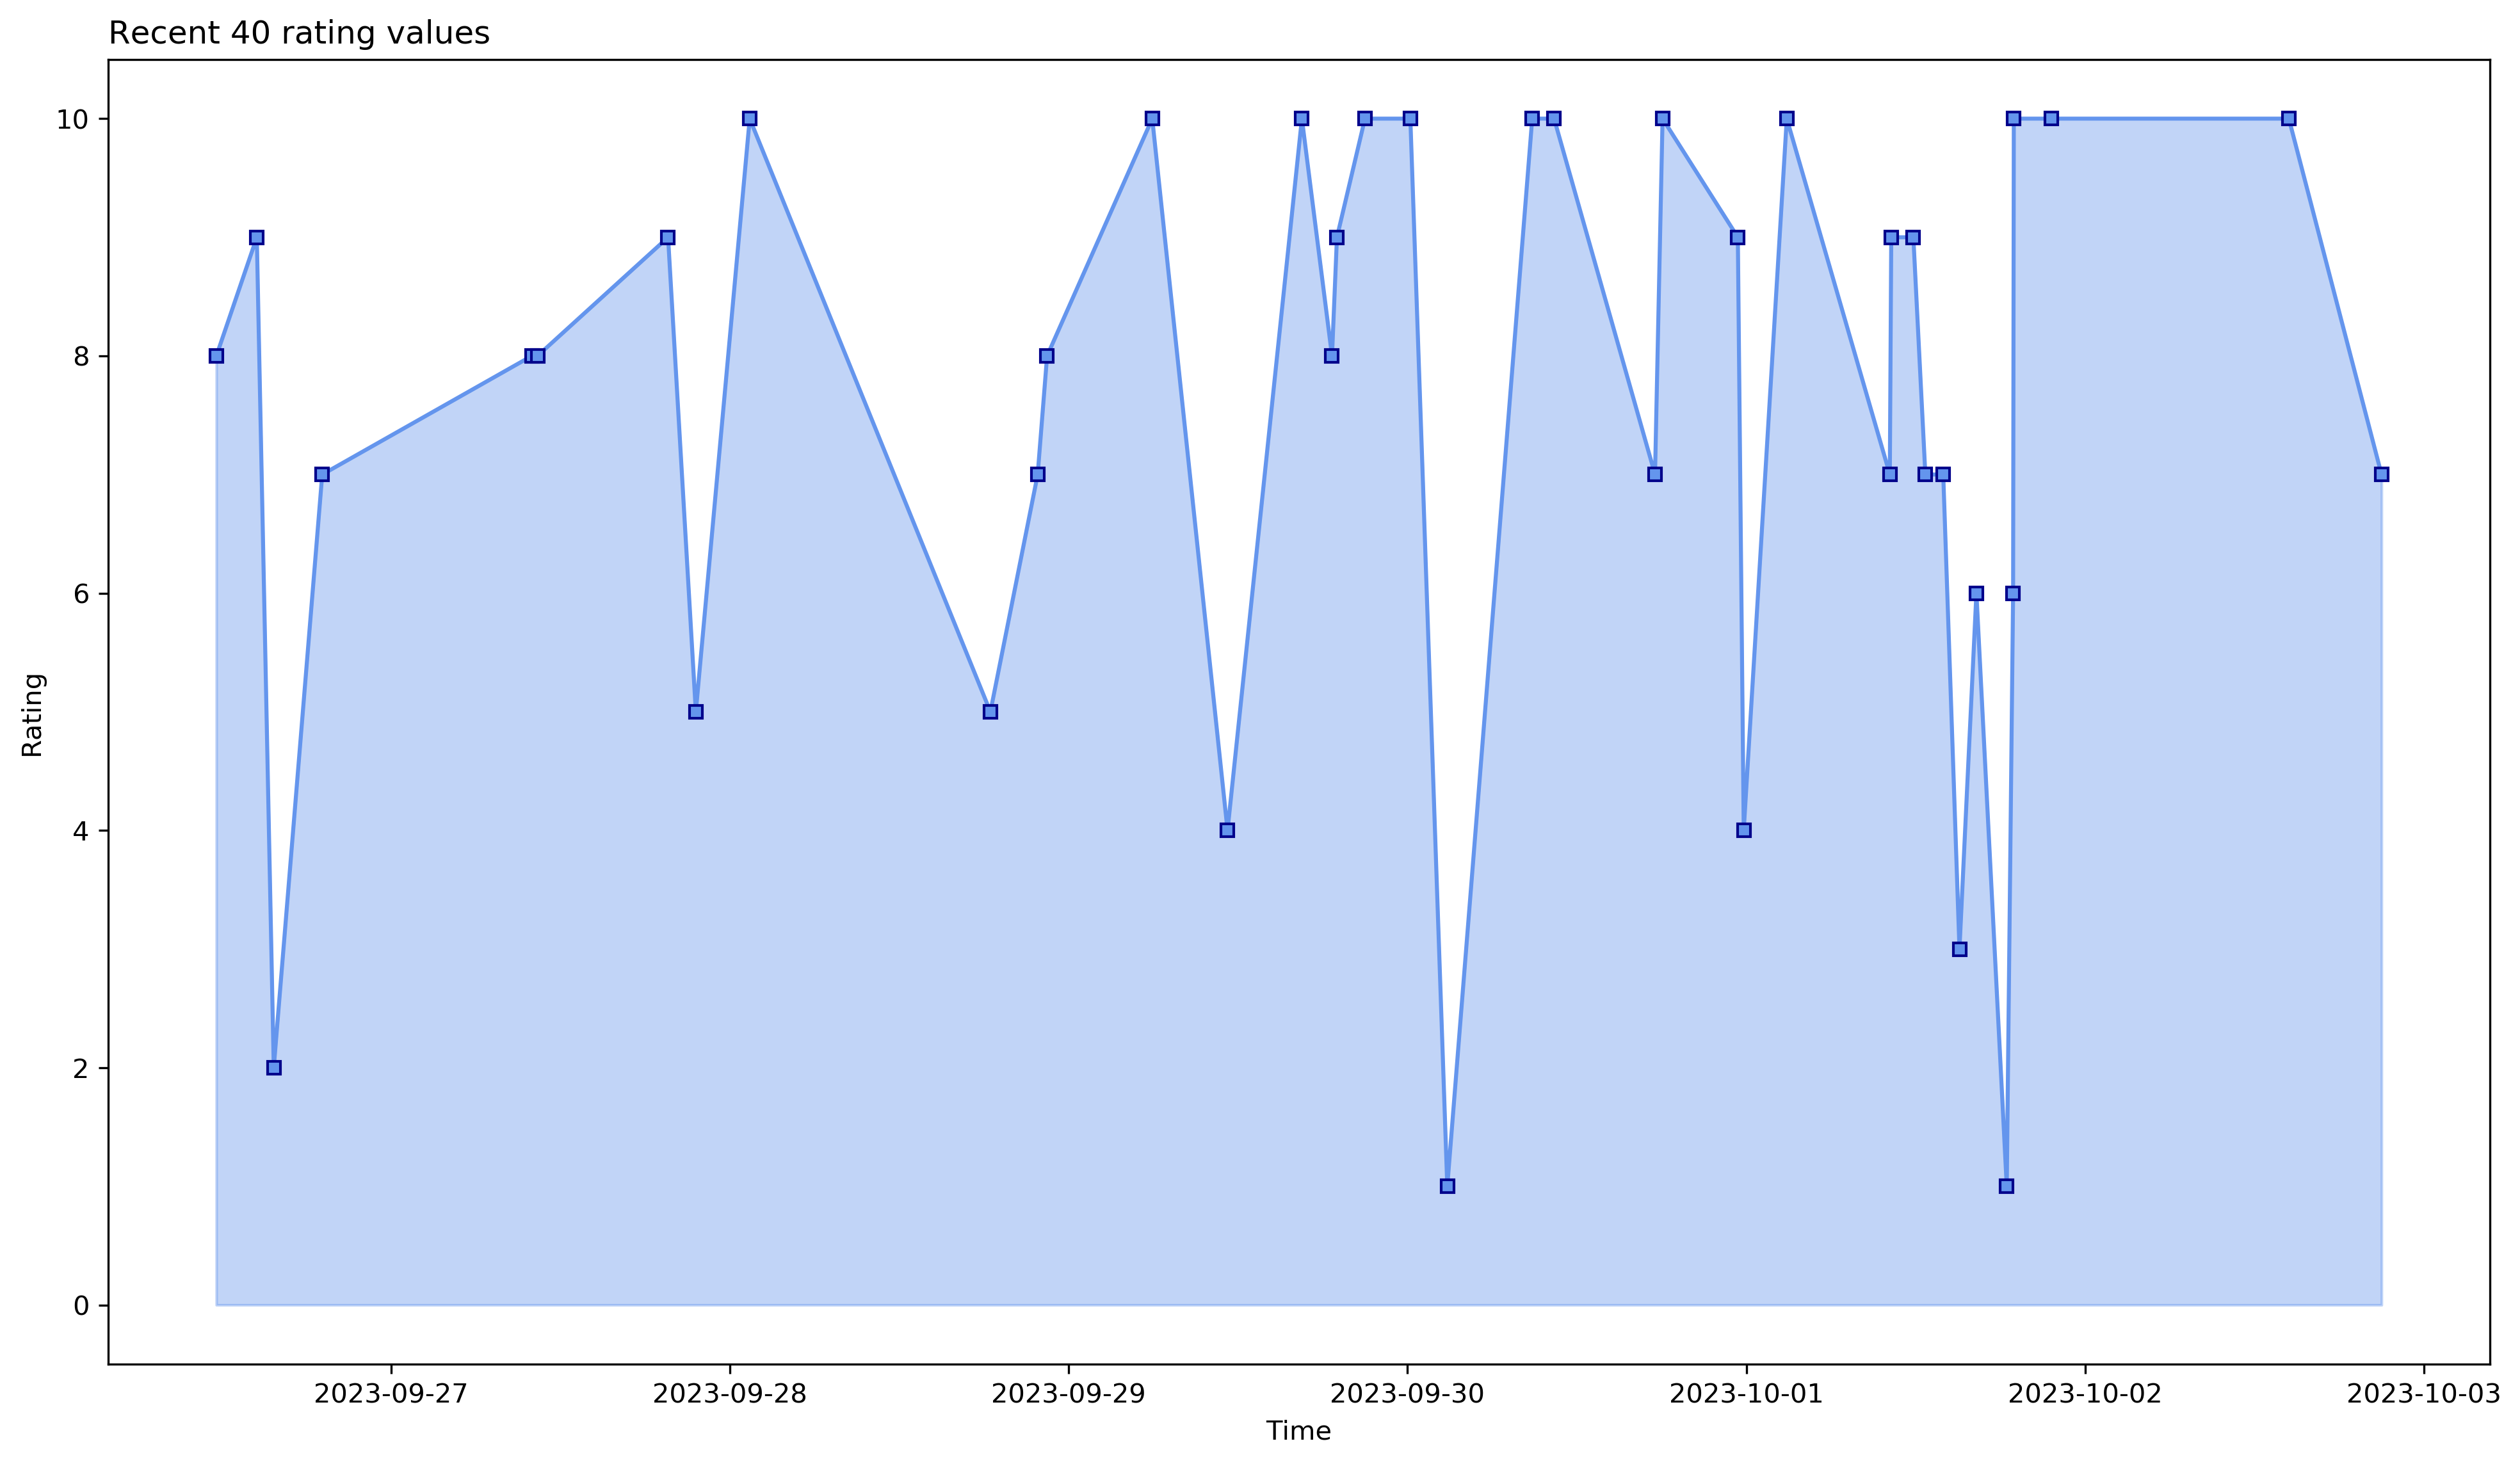

In [29]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

ax.plot(x, y, 
        color = "cornflowerblue", 
        marker = "s", 
        markersize = 5, 
        markeredgecolor = "darkblue");

ax.fill_between(x, y, 
                color = "cornflowerblue", 
                alpha = 0.4);

ax.set_title("Recent 40 rating values", loc="left")
ax.set_xlabel("Time")
ax.set_ylabel("Rating");

Как настраивать формат подписей (они мелковаты), поговорим чуть позже, небольшой спойлер – там снова понадобятся словари. А пока добавим на график сетку для удобства определения координат:

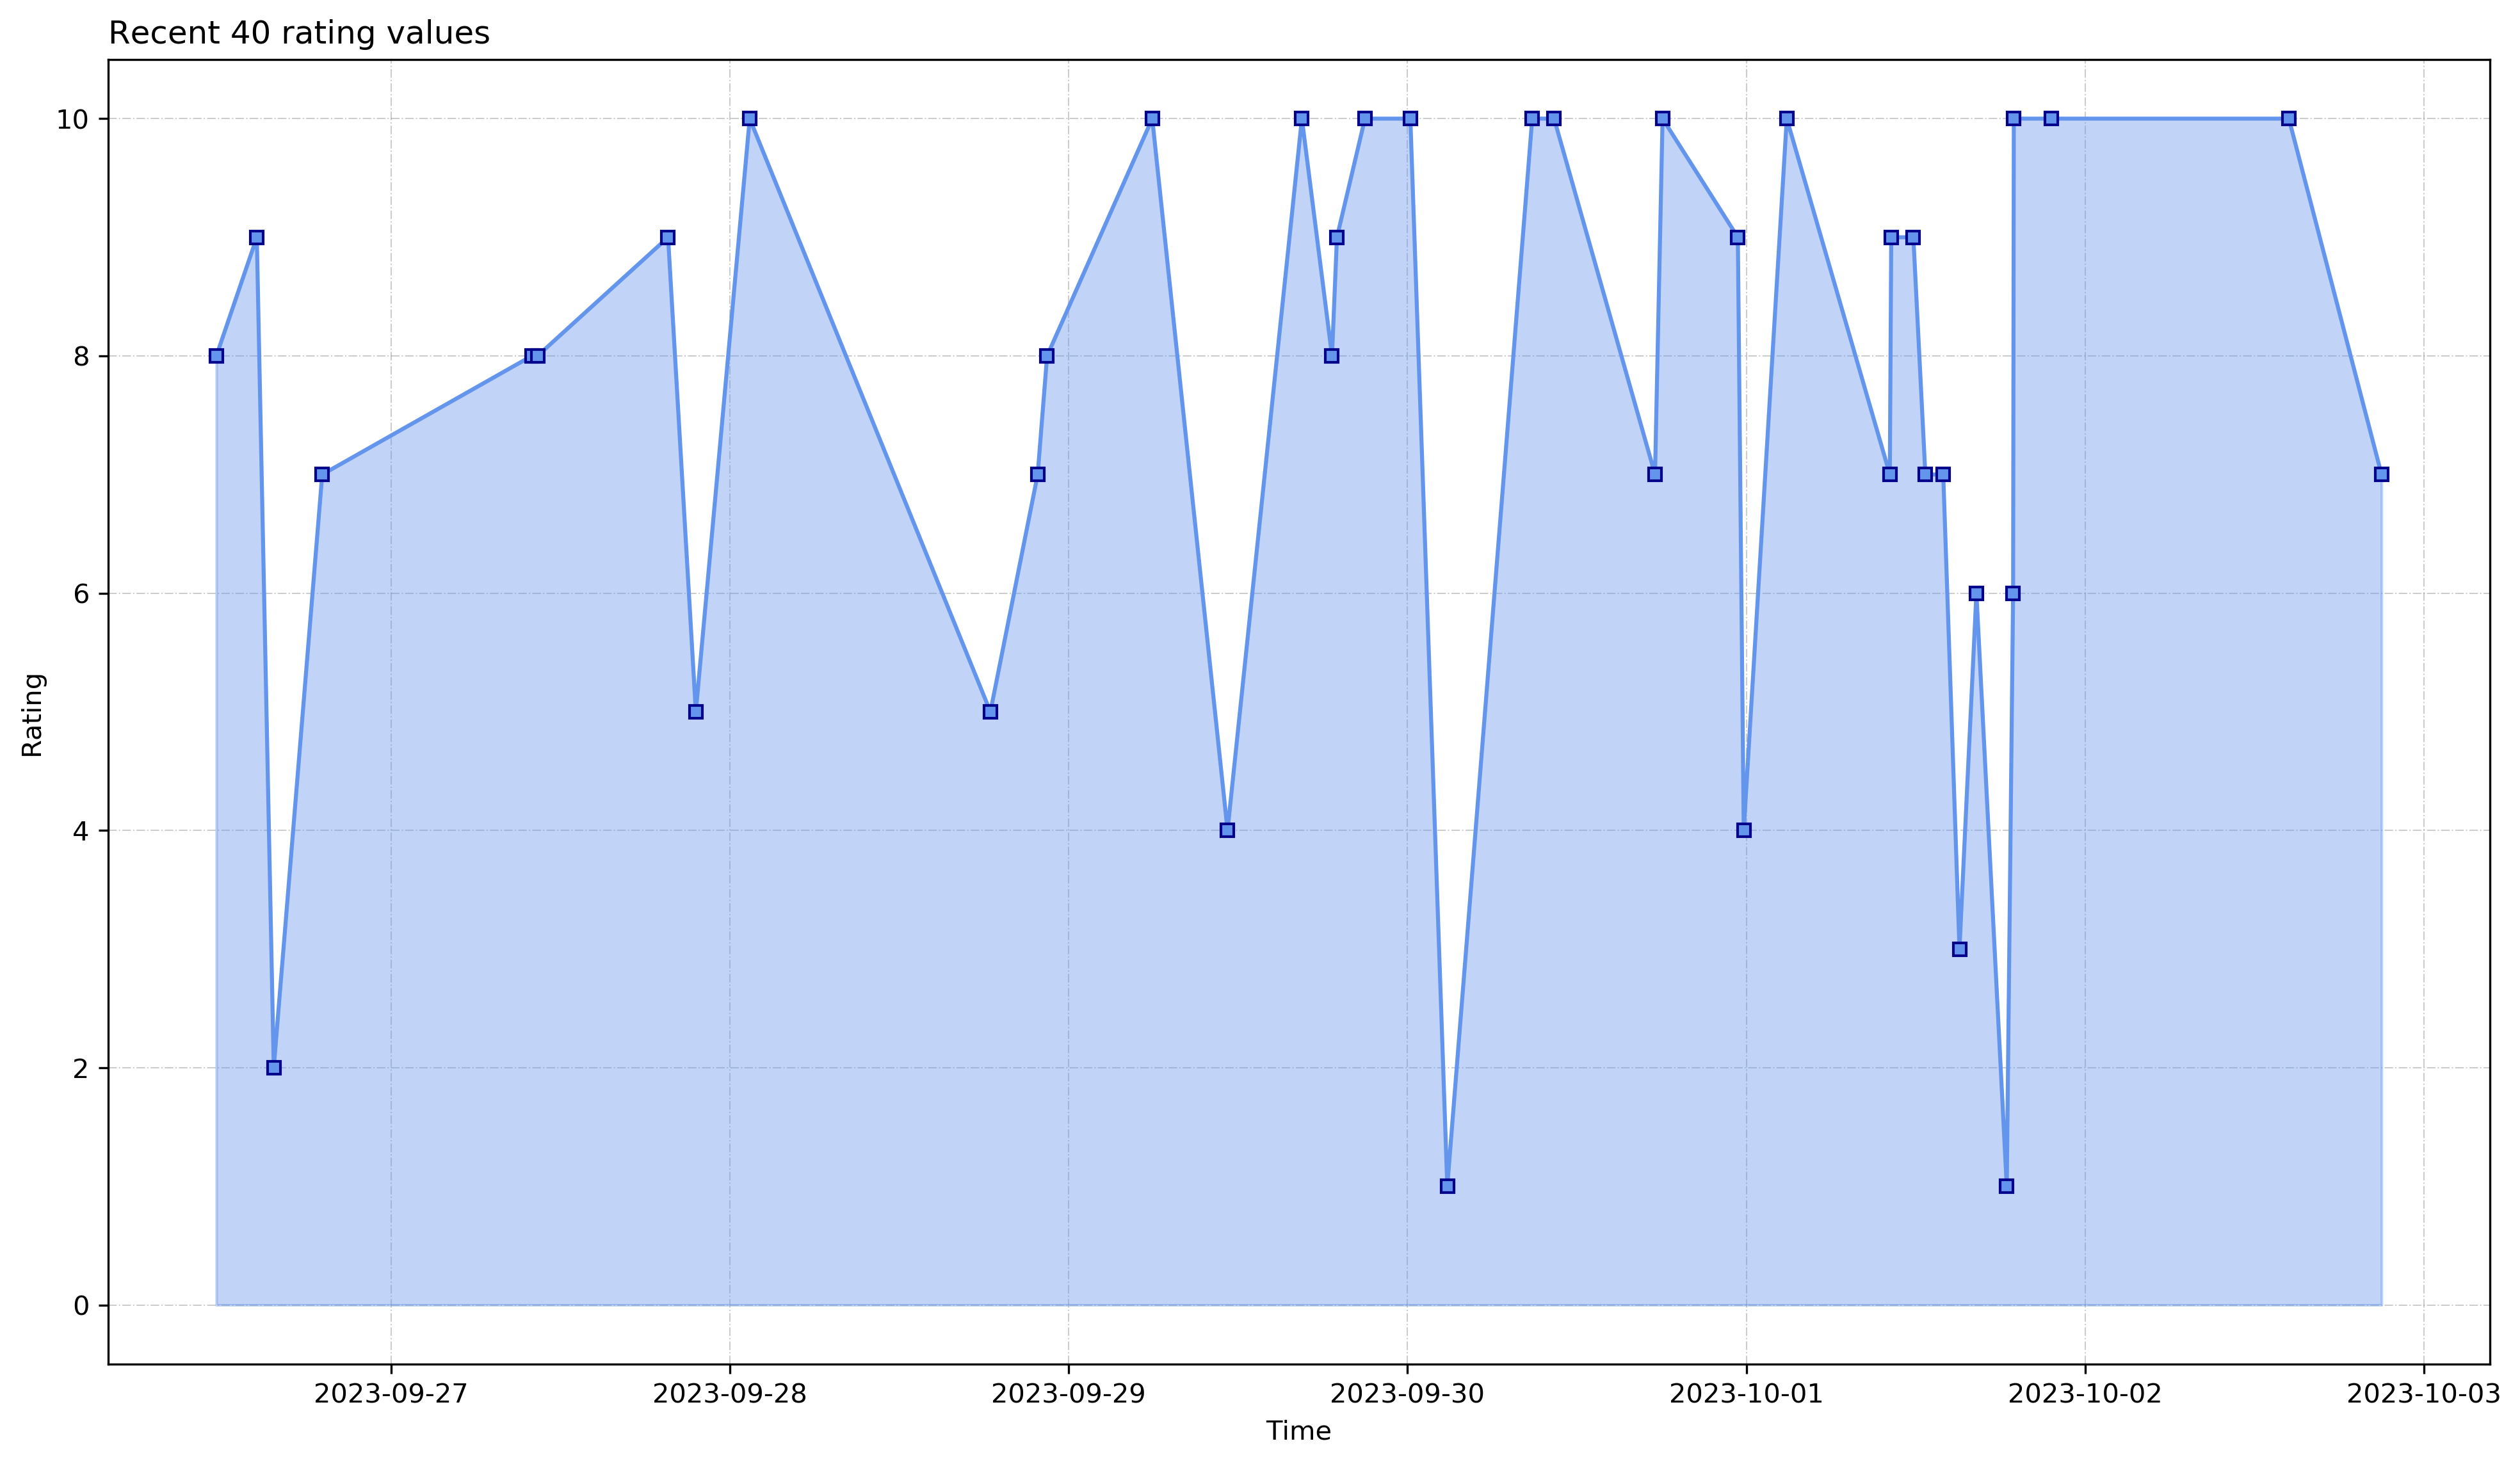

In [30]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

ax.plot(x, y, 
        color = "cornflowerblue", 
        marker = "s", 
        markersize = 5, 
        markeredgecolor = "darkblue");

ax.fill_between(x, y, 
                color = "cornflowerblue", 
                alpha = 0.4);

ax.set_title("Recent 40 rating values", loc="left")
ax.set_xlabel("Time")
ax.set_ylabel("Rating");

# отправляет сетку на задний план,
# чтобы не перечеркивала график

ax.set_axisbelow(True)

# color – цвет сетки
# linestyle – тип линии
# linewidth – толщина линии
# alpha – прозрачность

ax.grid(color ='grey', 
        linestyle = '-.', 
        linewidth = 0.5, 
        alpha = 0.4);

Почти идеально, но давайте ещё скорректируем подписи с датами по оси `x`. Обычно всё-таки на первом месте стоит число, а на последнем – год. Для этого импортируем из `matplotlib` ещё один модуль `dates`, теперь уже специально для работы с датами (тоже запишем его с сокращённым названием `mdates`):

In [31]:
import matplotlib.dates as mdates

Теперь повторим все действия, что и раньше, но в конце зададим шаблон, по которому `matplotlib` должен записать даты по горизонтальной оси, и применим его к оси X на нашем графике:

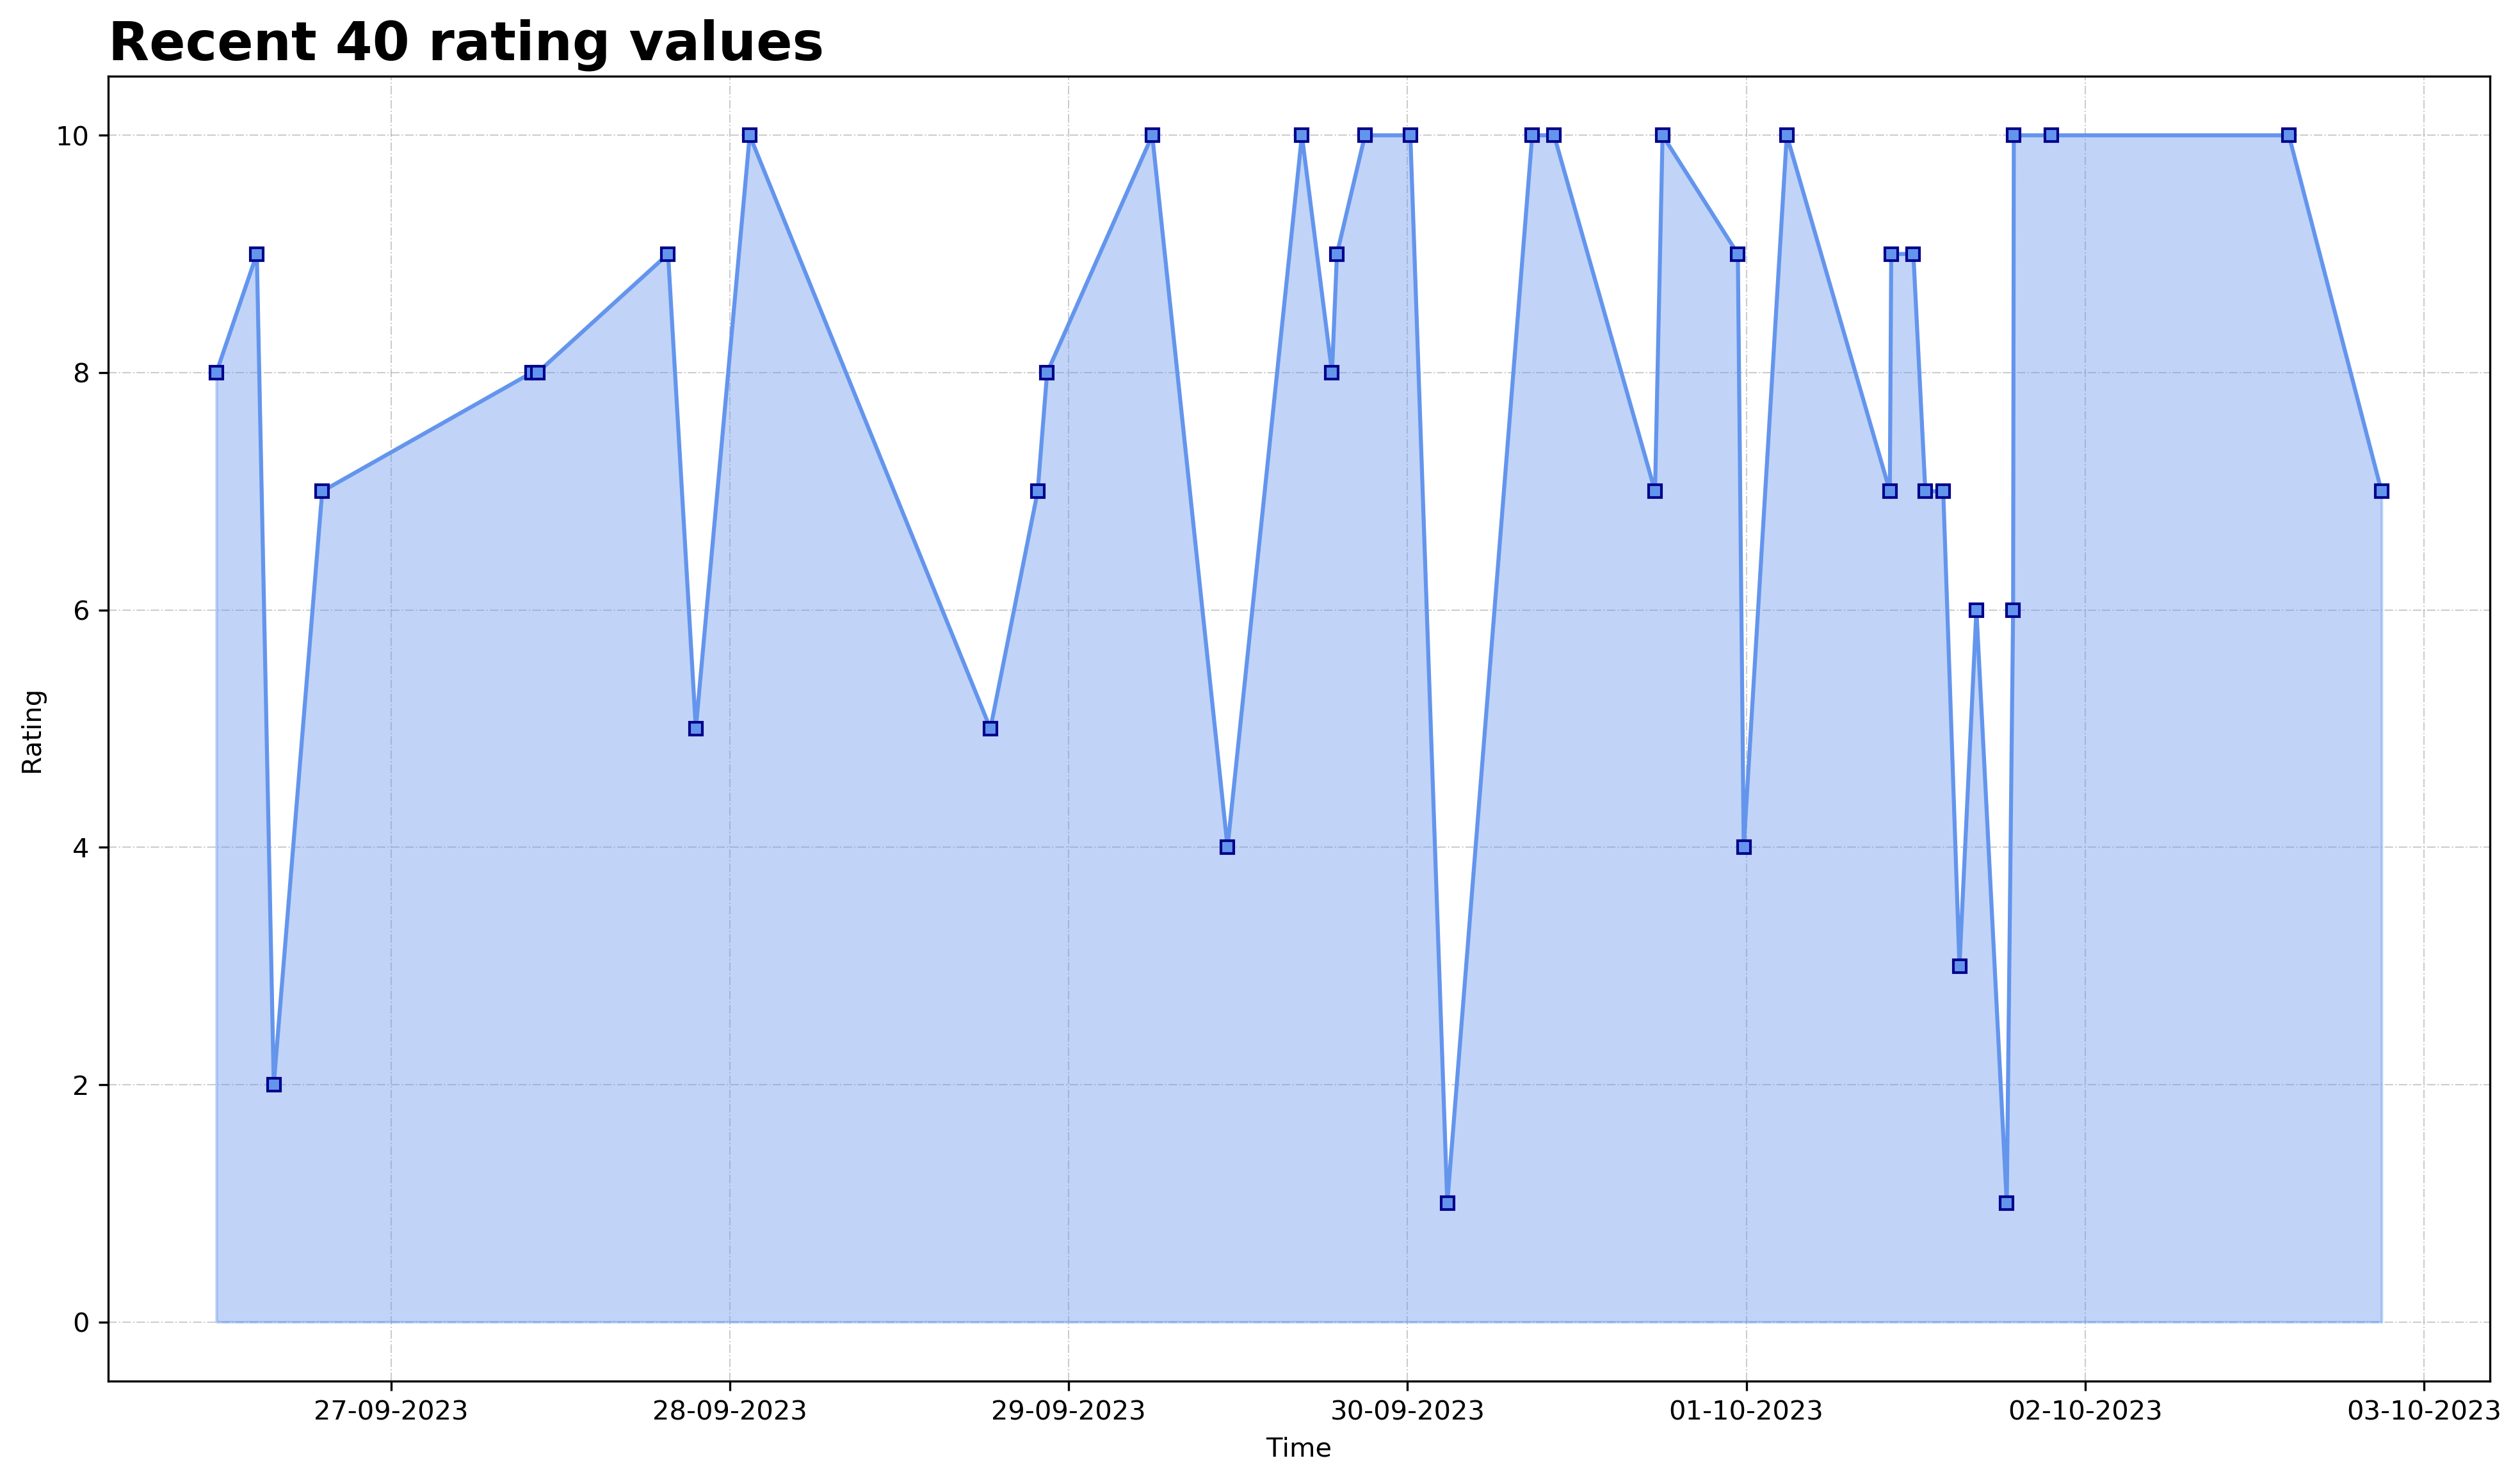

In [32]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

ax.plot(x, y, 
        color = "cornflowerblue", 
        marker = "s", 
        markersize = 5, 
        markeredgecolor = "darkblue");

ax.fill_between(x, y, 
                color = "cornflowerblue", 
                alpha = 0.4);

# не удержалась – пример словаря для настроек шрифта (fontdict)
# словарь fontdict с размером шрифта 20 и полужирным начертанием

ax.set_title("Recent 40 rating values", 
             loc="left",
             fontdict = {'fontsize': 20, 'fontweight': "semibold"})

ax.set_xlabel("Time")
ax.set_ylabel("Rating")


ax.set_axisbelow(True)
ax.grid(color ='grey', 
        linestyle = '-.', 
        linewidth = 0.5, 
        alpha = 0.4);

# шаблон по старой схеме: хотим день-месяц-год
# ax - оси, xaxis – ось x
# set_major_formatter – значения для главных засечек на оси

date_form = mdates.DateFormatter("%d-%m-%Y")
ax.xaxis.set_major_formatter(date_form)

Наконец, выгрузим график в файл с расширением `.png` (будет лежать в той же папке, что и этот ipynb-файл):

In [33]:
fig.savefig("rating_dyn.png")

Если потерялись, можно узнать, в какой папке Python сейчас работает, то есть, где лежит текущий ipynb-файл и файл с графиком:

In [34]:
import os

# os – базовый модуль для работы с оперативной системой
# getcwd() – get current working directort

os.getcwd()

'/Users/allat/Desktop'